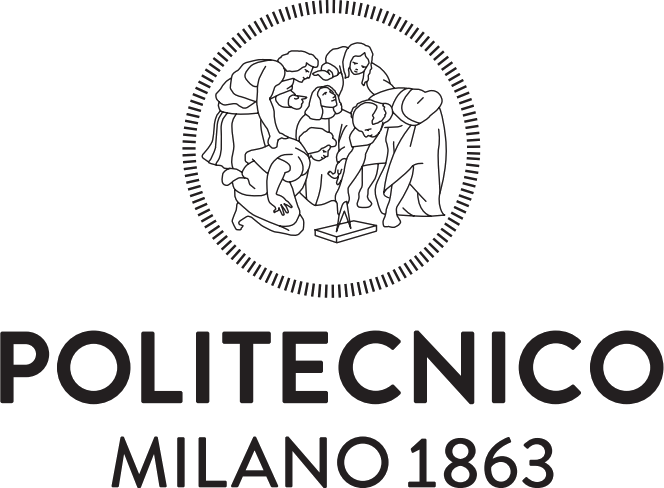

# Network Measurements and Data Analysis Lab

**Professor Alessandro Enrico Cesare Redondi**

**Moein Taherinezhad - 240265**

**Home Work No.1**




The objective of this assignment is to examine the correlation between Round-Trip Time (RTT) and the spatial separation of two network nodes.


We will proceed by implementing the subsequent steps:

**Part.1**
1. Make a dataset (The dataset utilized was obtained from the Speedtest website)
2. Examine the RTT Data Based on the Geographic Distance
3. Calculation the Slope, Mean Squared Error (MSE), Mean Absolute Error(MAE)

**Part.2**
4. Continent Analysis
5. Conclusions



Also, the Python data analysis libraries that we use in the following project include:

1. Pythonping
2. Pandas
3. Matplotlib
4. Numpy











**Part.1**

The following code installs the 'pythonping' library.
'pythonping' is a Python library that allows you to perform ICMP ping operations from within Python code. By installing this library, you can use it to measure round-trip times (RTT) between hosts in your Colab environment.

In [1]:
!pip install pythonping
from pythonping import ping


In [2]:
import seaborn as sns #statsmodels is a Python module that provides classes and functions for statistical modeling and data analysis.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Make a dataset

I sampled 113 pingable servers from the initial dataset. As the Speedtest server data lacked latitude and longitude attributes necessary for distance measurement, I used IP Location website to locate server positions and gather additional information including IP, region, and country.






In [3]:
df = pd.read_csv("/content/Final_dataset.csv")
#read the dataset file
df.head(20)
#Show the first five rows

,Country,City,Continent,Host,Ping,Latitude,Longitude,Region,IP
0,Brazil,Turmalina,South America,sp2.mcinfor.com.br,176.229417,-17.2856,-42.7300,Minas Gerais,177.85.104.141
1,Bolivia,Santa Cruz de la Sierra,South America,digital.bo,157.843561,-17.8000,-63.1667,Santa Cruz,190.211.224.35
2,United States,Atlanta,North America,test1.newworldcatv.ph,49.387180,33.7490,-84.3880,Georgia,45.79.222.138
3,Myanmar,Yangon,Asia,speed.netcoreinternet.com,219.286878,16.8053,96.1561,Yangon,103.80.36.34
4,Malawi,Lilongwe,Africa,ookla-llw.skyband.mw,326.438733,-13.9669,33.7873,Lilongwe,41.190.95.232
5,United States,Schaumburg,North America,sp.netinformatik.com,69.728184,42.0142,-88.0932,Illinois,23.160.192.16
6,Indonesia,Batam,Asia,banjarmasin.speedtest.telkom.net.id,201.972918,1.0833,104.0333,Kepulauan Riau,118.98.104.250
7,Italy,Latina,Europe,speedtest.panservice.it,163.251827,41.4661,12.9043,Lazio,212.66.97.26
8,Brazil,Porto Alegre,South America,topwebtelecom.net.br,162.641071,-30.0331,-51.2300,Rio Grande do Sul,177.12.170.30
9,Australia,Perth,Oceania,speedtest-p1.emergeinternet.com.au,194.771193,-31.9522,115.8614,Western Australia,103.101.234.108


Locate my present IP address, which corresponds to the IP address of the COLAB Server.

In [4]:
!curl ipecho.net/plain
# Please refrain from executing this cell as the IP addresses of your current PC
# or the Colab server may vary from day to day. Instead, you can verify the IP
# address information by visiting https://www.iplocation.net/ip-lookup.


34.86.15.96

By looking at the IP adress of our machine **34.139.16.82** we notice the server is located in North Charleston, South Carolina, United States.

In [10]:
IP_Info = {
    "country": "United States",
    "city": "North Charleston",
    "continent": "America",
    "latitude": 32.8546,
    "longitude": -79.9748,
    "IP": "34.139.16.82",
    "Region": "South Carolina"
    }

Using the provided data, we can proceed to ping the hosts and update the dataset with ping values.

In [11]:
# This code reads data from a pre-populated list of hosts and performs ping tests on them.
# Define a function to perform ping tests
def perform_ping(host):
    try:
        response = ping(host, count=1)
        if response.success:
            return response.rtt_avg * 1000
    except:
        pass
    return None

# Read data from a dataset
df = pd.read_csv("/content/Final_dataset.csv")

# Iterate through the rows and update ping values
for index, row in df.iterrows():
    ping_result = perform_ping(row["Host"])
    if ping_result is not None:
        df.at[index, 'Ping'] = ping_result

# Write the updated DataFrame to a CSV file to avoid pinging every time
df.to_csv("First_dataset_V2.csv", index=False)
#Save updated Dataframe in dataset_V2
df = pd.read_csv("First_dataset_V2.csv")

df.head(20)

,Country,City,Continent,Host,Ping,Latitude,Longitude,Region,IP
0,Brazil,Turmalina,South America,sp2.mcinfor.com.br,2000.000000,-17.2856,-42.7300,Minas Gerais,177.85.104.141
1,Bolivia,Santa Cruz de la Sierra,South America,digital.bo,132.052732,-17.8000,-63.1667,Santa Cruz,190.211.224.35
2,United States,Atlanta,North America,test1.newworldcatv.ph,16.995345,33.7490,-84.3880,Georgia,45.79.222.138
3,Myanmar,Yangon,Asia,speed.netcoreinternet.com,2000.000000,16.8053,96.1561,Yangon,103.80.36.34
4,Malawi,Lilongwe,Africa,ookla-llw.skyband.mw,267.413335,-13.9669,33.7873,Lilongwe,41.190.95.232
5,United States,Schaumburg,North America,sp.netinformatik.com,26.409356,42.0142,-88.0932,Illinois,23.160.192.16
6,Indonesia,Batam,Asia,banjarmasin.speedtest.telkom.net.id,235.257644,1.0833,104.0333,Kepulauan Riau,118.98.104.250
7,Italy,Latina,Europe,speedtest.panservice.it,105.905069,41.4661,12.9043,Lazio,212.66.97.26
8,Brazil,Porto Alegre,South America,topwebtelecom.net.br,115.089799,-30.0331,-51.2300,Rio Grande do Sul,177.12.170.30
9,Australia,Perth,Oceania,speedtest-p1.emergeinternet.com.au,242.181456,-31.9522,115.8614,Western Australia,103.101.234.108


## 2. Examine the RTT Data Based on the Geographic Distance


Let's proceed with data analysis and Explore the distribution of our servers across different continents

As we observer in the distribution of our servers we have a really realistic number of servers that suits the internet users of each continent. Therefore we can start working on our data.

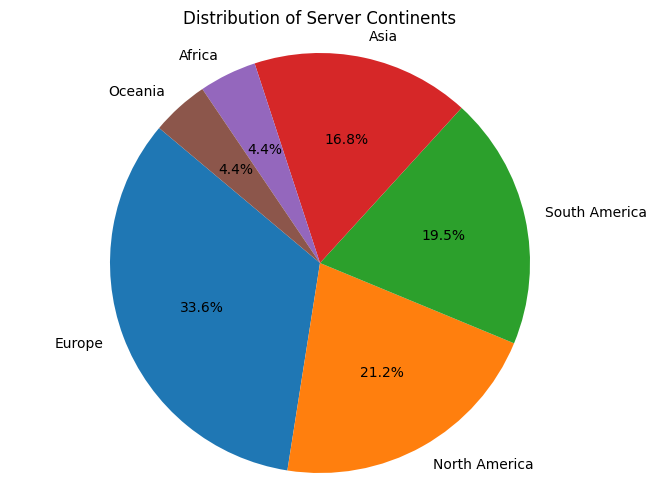

In [12]:
import matplotlib.pyplot as plt

# Getting the value counts of 'Continent' column
cn_count = df["Continent"].value_counts()

# Plot distribution count as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(cn_count, labels=cn_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Server Continents")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


The factors that can affect the RTT and how are we tackling them. They are include:
1. Distance  
2. Bandwidth
3. Network Congestion
4. Packet Size

For example:
    Distance between sender and receiver impacts RTT due to longer travel distances. We'll use the Haversine formula to measure distances between geographical points.

### Analysis and Calculation of Geographic Distance
We'll employ the Haversine formula to calculate distances between geographical points.  Utilizing the geopy.distance.distance() function, which applies the Haversine formula, we'll calculate these distances and integrate them into the dataframe.

In [21]:
from geopy.distance import distance

# Define a function to calculate distance
def calculate_distance(row):
    source_coordinates = (IP_Info.get("latitude"), IP_Info.get("longitude"))
    server_coordinates = (row["Latitude"], row["Longitude"])
    return distance(source_coordinates, server_coordinates).km

# Apply the function to add a distance column to the DataFrame
df["Distance"] = df.apply(lambda row: calculate_distance(row), axis=1)
# To Look at the final Dataframe



In [14]:
# Filtering out the timeout requests
df = df[df["Ping"] != 2000]

# Checking if there is any 2000 RTT remaining
df["Ping"].isin([2000]).any()

False

In [15]:
df.describe()

,Ping,Latitude,Longitude,Distance
count,99.000000,99.000000,99.000000,99.000000
mean,135.373699,21.260957,4.795229,8096.108692
std,66.380654,30.805233,76.715315,4633.566455
min,8.324044,-37.831800,-124.163700,422.779878
25%,94.064262,-5.531950,-54.310700,5636.622750
50%,127.149481,32.516000,11.575500,7480.082275
75%,185.011313,46.453750,61.527650,11436.126258
max,268.296835,68.564600,153.430900,18535.888478


Upon inspecting the data, it is evident that the minimum distance between servers is 422 kilometers, represented by a server located in North Charleston, while the maximum distance extends to approximately 18535 kilometers. The mean distance across all servers is calculated at approximately 8096 kilometers. Considering that our source is situated within a relatively secluded locale in the United States, these distances are deemed acceptable.

### Plotting the RTT / Distance


With the refined DataFrame now available, we can proceed with plotting. To achieve optimal fitting of our data, we'll employ a linear function. In this context, we'll utilize np.polyfit, a method that fits a polynomial function to a given set of data points through least-squares regression. Given the linear nature of our problem, we'll specify a degree of 1. Upon examination of our scatter plot, it's evident that the relationship between distance and RTT follows a linear pattern.
From our scatter plot, it's evident that there exists a linear relationship between distance and RTT. Notably, we recognize that RTT is determined by the formula RTT = 2(L/C + d/v) + n.

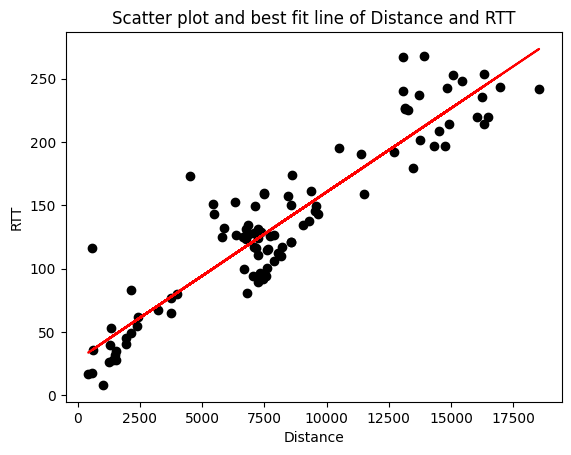

In [16]:
from sklearn.linear_model import LinearRegression

# Extracting features and target variable
X = df[["Distance"]]
y = df["Ping"]

# Create a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Calculate the coefficients
m = model.coef_[0]
b = model.intercept_

# Create the line of best fit function
best_fit_line = lambda x: m * x + b

# Plot the scatter plot and the line of best fit
plt.scatter(df["Distance"], df["Ping"], color='k')
plt.plot(df["Distance"], best_fit_line(df["Distance"]), color='r')

plt.xlabel("Distance")
plt.ylabel("RTT")
plt.title("Scatter plot and best fit line of Distance and RTT")

# Show the plot
plt.show()


We observe that our model fits pretty well inside the scatter plot. We can observe in our scatter plot that the relation between distance and RTT is linear.

## 3.Calculating the Slope, Mean Squared Error (MSE), Mean Absolute Error(MAE),and Root Mean Squared Error for the regression model


To assess the performance of our polynomial regression model, we'll evaluate several metrics, including Slope, Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error. These metrics will help us gauge how effectively we can predict RTT based on distance. Calculating the MAE will provide insight into the actual error magnitude.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def test_linear_model(df, test_size, degree):
    # Extract features and target variable
    X = df[['Distance']]
    y = df['Ping']

    # Split the data into training and testing sets with a specified test_size ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle= True)

    # Fit a polynomial regression model on the training set
    model = LinearRegression()
    model.fit(X_train ** degree, y_train)

    # Use the model to make predictions on the testing set
    y_pred = model.predict(X_test ** degree)

    # Print model evaluation metrics
    print("Slope:", model.coef_[0])
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE: ", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))


In [33]:
# Testing for 80/20
test_linear_model(df, 0.2, 1)

Slope: 0.013191071721903215
MSE: 632.9357988374327
RMSE:  0.8402237881492316
MAE: 21.95658717452131


In [34]:
# Testing for 70/30
test_linear_model(df, 0.3, 1)

Slope: 0.013162050025493035
MSE: 833.4095080275173
RMSE:  0.8241428967691278
MAE: 23.710768959236002


In [35]:
# Testing for 60/40
test_linear_model(df, 0.4, 1)

Slope: 0.013273948627635
MSE: 753.5070450319234
RMSE:  0.812951573082715
MAE: 21.8986853348681


If we solely evaluate the R2 value, which stands at 0.82(70/30), we obtain a moderately average result. However, it's imperative to recognize the limited size of our dataset, comprising only 113 rows, potentially compromising the accuracy of our tests. Nonetheless, despite the dataset's small size, we achieved a proficient calculation of RTT. This is evidenced by the Mean Absolute Error (MAE) value of 23.7, signifying a relatively minimal margin of error, especially given the initial dataset constraints.

## 4. Continent Analysis

Upon scrutinizing the data from both datasets, we noted that the model performs admirably for shorter distances, but the error increases noticeably as distances lengthen. Upon closer examination, this phenomenon may be attributed to the location of continents. To investigate further, we generated a correlation heatmap encompassing RTT, Distance, and Continents.

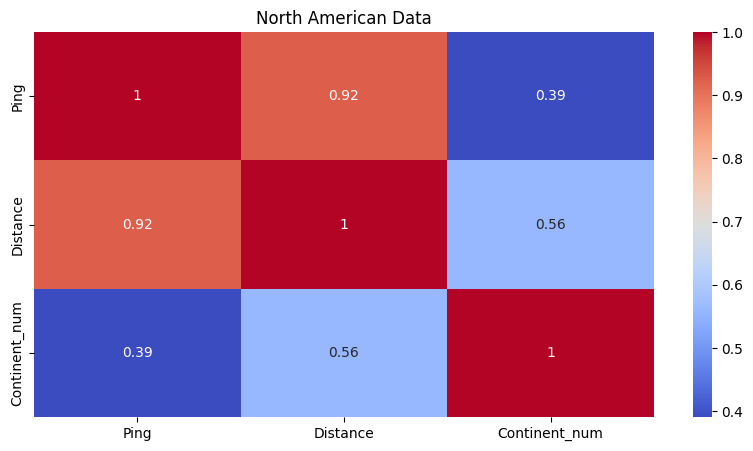

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Continent' column to a numeric representation
df['Continent_num'] = pd.factorize(df['Continent'])[0]

# Calculate correlation matrices
corr_matrix1 = df[['Ping', 'Distance', 'Continent_num']].corr()

# Create a figure with one subplot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the heatmap
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', ax=ax1)

# Set title for the subplot
ax1.set_title('North American Data')

# Show the plot
plt.show()


For North America value the correlation is 0.39 which considering the distance of our source with other destinations is something to be expected.

## 5. Conclusin
Upon thorough analysis, we concluded that propagation delay plays a minor role, with bandwidth, congestion, and routing being the primary factors influencing delays. Our data revealed a linear association between RTT and distance. Additionally, upon closer examination, we identified a correlation between RTT and continent. While this correlation likely extends to countries and regions, we focused solely on continents due to data limitations. To integrate the continent variable into our analysis, we adopted one-hot encoding.